<center> <h1> Daily Coal Stocks in Indian Thermal Power Stations </h1>

## 📌 Problem Statement:
India’s thermal power plants heavily rely on coal as their primary fuel source. Timely and sufficient coal supply is critical to ensuring uninterrupted electricity generation. However, frequent issues like transportation delays, uneven stock distribution, and high coal consumption have led many power plants to face critical shortages, impacting national energy stability. There is a need to analyze and monitor coal stock patterns across different states, sectors, and power plants to identify potential risks and improve decision-making for coal management.
## 🎯 Objective:
The main objective of this project is to perform Exploratory Data Analysis (EDA) on the Daily Coal Stocks dataset collected from thermal power plants across India. This analysis aims to:

    •Understand coal availability and consumption trends.

    •Identify power plants operating in critical or super-critical conditions.

    •Analyze the impact of transport modes and sector types on coal stock levels.

    •Detect patterns over time in coal supply, demand, and usage.

    •Provide insights that can help optimize coal distribution and prevent power shortages.


## 📌 Purpose:
This dataset records daily coal stock and usage data from thermal power stations across India. It helps track coal availability, consumption, supply mode, and operational status (critical/non-critical) for each power plant.
The Daily Coal Stocks dataset contains over 3.6 lakh (362,035) records of daily coal data from power stations across India. Each entry gives detailed information about a power plant, including its name, location (state), sector (like state, central, or private), and how coal is transported there. It also tracks the plant's coal needs, how much coal was actually received and consumed, and how many days' worth of coal is in stock. Important performance indicators like the Plant Load Factor (PLF%) and stock in days are also included. However, some columns have missing data—for example, only around 2.2 lakh entries have coal receipt info, and just about 74,000 entries mention if a plant is in a critical condition. Despite some missing values, the dataset is rich and can help identify power stations that may be running low on coal, analyze supply patterns, and support better coal distribution planning.


### Data Set Link
https://indiadataportal.com/p/power/r/mop-coal_stock-pl-dl-aaa 

##   1: Importing Required Libraries
### Pandas:
Used to read, explore, and manipulate the dataset (e.g., loading Excel files, checking data types, filtering rows).
### Matplotlib.pyplot:
Helps create basic visualizations like bar charts, line graphs, and histograms to understand data distributions.
### Seaborn:
Built on top of Matplotlib, it provides more attractive and easy-to-use plotting functions like heatmaps and boxplots for deep insights.
### NumPy:
Supports numerical operations, especially useful when working with arrays, handling NaN values, or applying mathematical functions.
### SimpleImputer (from sklearn.impute):
Helps handle missing values by automatically filling them using strategies like mean, median, or most frequent value.

# 1. Import required libraries

In [1]:
# 1. Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

##  2- Importing DataSet
→ Used pd.read_excel() to load the Excel file into a DataFrame. 

→ The file path points to the local machine: C:\Users\ASUS\EDA-CA\daily-coal-stocks.csv.xlsx. 

→ The dataset is stored in a variable called df for further analysis.

→ This step is essential to make the data ready for inspection, cleaning, and visualization.

In [2]:
# 2. Load the dataset
df = pd.read_excel(r"C:\Users\ASUS\EDA-CA\22070521099_CA1_EDA_OriginalDataSet.xlsx")

##  3: Basic Info 
df.info() shows the dataset's structure — column names, data types, non-null counts, and memory usage — to quickly assess data quality.

In [3]:
print("\n--- BASIC INFO ---")
print(df.info())


--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362035 entries, 0 to 362034
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   id                               362035 non-null  int64         
 1   date                             362035 non-null  datetime64[ns]
 2   state_name                       362035 non-null  object        
 3   state_code                       362035 non-null  int64         
 4   power_station_name               362035 non-null  object        
 5   sector                           362035 non-null  object        
 6   utility                          362035 non-null  object        
 7   mode_of_transport                362035 non-null  object        
 8   capacity                         362034 non-null  float64       
 9   daily_requirement                362033 non-null  float64       
 10  daily_receipt           

##  4: Dataset Dimensions
df.shape returns the number of rows and columns in the dataset.
In this case, it shows 362,035 rows and 22 columns, indicating a large dataset of daily coal stock records, including attributes like state, power station, stock levels, and consumption details.

In [4]:
print("\n--- SHAPE OF DATA ---")
print(df.shape)       # Dimensions of the dataset-


--- SHAPE OF DATA ---
(362035, 22)


##   5: View First 5 Rows
df.head() displays the first 5 rows of the dataset.
It provides a quick preview to ensure the data has been loaded correctly, lets you verify column names, and helps spot any obvious formatting or value issues early on.

In [5]:
# Step 3: View first 5 rows
print("\n--- FIRST 5 ROWS ---")
print(df.head())


--- FIRST 5 ROWS ---
   id       date      state_name  state_code         power_station_name  \
0   0 2018-11-27  Andhra Pradesh          28  Damodaram Sanjeevaiah Tps   
1   1 2018-11-27  Andhra Pradesh          28         Dr. N.Tata Rao Tps   
2   2 2018-11-27  Andhra Pradesh          28            Painampuram Tpp   
3   3 2018-11-27  Andhra Pradesh          28            Rayalaseema Tps   
4   4 2018-11-27  Andhra Pradesh          28                   Simhadri   

           sector  utility mode_of_transport  capacity  daily_requirement  \
0    State Sector  APGENCO              Rail    1600.0              15.95   
1    State Sector  APGENCO              Rail    1760.0              20.59   
2      Pvt Sector      IPP              Rail    1320.0              11.33   
3    State Sector  APGENCO              Rail    1650.0               9.01   
4  Central Sector     NTPC              Rail    2000.0              23.79   

   ...  req_normative_stock  normative_stock_days  indigenous_st

##  6: View Column Names
print(df.columns) displays a list of all column names in the dataset.
This helps you understand what kind of information is available (e.g., state name, power station, stock levels, etc.) and is useful for referencing specific columns during data cleaning or analysis.

In [6]:
print(df.columns)     # Column names

Index(['id', 'date', 'state_name', 'state_code', 'power_station_name',
       'sector', 'utility', 'mode_of_transport', 'capacity',
       'daily_requirement', 'daily_receipt', 'daily_consumption',
       'req_normative_stock', 'normative_stock_days', 'indigenous_stock',
       'import_stock', 'total_stock', 'stock_days', 'plf_prcnt',
       'actual_vs_normative_stock_prcnt', 'is_critical', 'remarks'],
      dtype='object')


In [7]:
df.head()

,id,date,state_name,state_code,power_station_name,sector,utility,mode_of_transport,capacity,daily_requirement,...,req_normative_stock,normative_stock_days,indigenous_stock,import_stock,total_stock,stock_days,plf_prcnt,actual_vs_normative_stock_prcnt,is_critical,remarks
0,0,2018-11-27,Andhra Pradesh,28,Damodaram Sanjeevaiah Tps,State Sector,APGENCO,Rail,1600.0,15.95,...,NaN,20.0,26.45,59.74,86.19,5.0,46.68,NaN,NaN,CIL Supply 98% of prorata ACQ.
1,1,2018-11-27,Andhra Pradesh,28,Dr. N.Tata Rao Tps,State Sector,APGENCO,Rail,1760.0,20.59,...,NaN,20.0,93.39,0.00,93.39,5.0,67.63,NaN,Critical,Supply to APGENCO 84% prorata ACQ
2,2,2018-11-27,Andhra Pradesh,28,Painampuram Tpp,Pvt Sector,IPP,Rail,1320.0,11.33,...,NaN,20.0,37.58,7.97,45.55,4.0,60.21,NaN,Critical,CIL Supply 69% of prorata ACQ.
3,3,2018-11-27,Andhra Pradesh,28,Rayalaseema Tps,State Sector,APGENCO,Rail,1650.0,9.01,...,NaN,25.0,125.22,0.00,125.22,14.0,37.64,NaN,NaN,NaN
4,4,2018-11-27,Andhra Pradesh,28,Simhadri,Central Sector,NTPC,Rail,2000.0,23.79,...,NaN,25.0,0.00,0.00,0.00,0.0,66.02,NaN,NaN,Supply to NTPC 99% of prorata ACQ


##   7: Convert and Sort by Date
We convert the 'date' column to datetime format using pd.to_datetime(df['date']).
This ensures the column is treated as a time series, enabling accurate time-based operations.

We then sort the dataset by date with df.sort_values(by='date') to arrange records in chronological order — important for trend analysis and time series visualizations.

In [8]:
# 4. Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

##   8: Check for Missing Values
We use df.isnull().sum() to identify missing values in each column.
This helps us understand data completeness and decide on appropriate strategies like filling missing values with the mean/median or dropping rows/columns if necessary.

In [9]:
# Step 4: Check missing values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())


--- MISSING VALUES ---
id                                      0
date                                    0
state_name                              0
state_code                              0
power_station_name                      0
sector                                  0
utility                                 0
mode_of_transport                       0
capacity                                1
daily_requirement                       2
daily_receipt                      139763
daily_consumption                  152469
req_normative_stock                143626
normative_stock_days                    2
indigenous_stock                     8700
import_stock                         8700
total_stock                             0
stock_days                         213379
plf_prcnt                             980
actual_vs_normative_stock_prcnt    143626
is_critical                        287597
remarks                            253323
dtype: int64


## 9: Drop Columns with >30% Missing Values
We use df.dropna(axis=1, thresh=int(0.7 * len(df)), inplace=True) to drop columns that have more than 30% missing values. This helps retain only those columns that contain sufficient data for meaningful analysis.

In [10]:
df.dropna(axis=1, thresh=int(0.7 * len(df)), inplace=True) # Drop columns with >30% missing

In [11]:
print(df.isnull().sum())

id                         0
date                       0
state_name                 0
state_code                 0
power_station_name         0
sector                     0
utility                    0
mode_of_transport          0
capacity                   1
daily_requirement          2
normative_stock_days       2
indigenous_stock        8700
import_stock            8700
total_stock                0
plf_prcnt                980
dtype: int64


## Step 10: Impute Remaining Missing Values
We used median imputation with SimpleImputer from sklearn to fill missing values in key numerical columns like capacity, daily requirement, and PLF. This ensures the dataset is complete for analysis.

In [12]:
from sklearn.impute import SimpleImputer

# List of numerical columns to impute
num_cols = ['capacity', 'daily_requirement', 'normative_stock_days',
            'indigenous_stock', 'import_stock', 'plf_prcnt']

# Apply median imputation
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [13]:
len(df)

362035

In [14]:
# # Filling missing numerical values using median (better than mean for skewed data)
# df['capacity'] = df['capacity'].fillna(df['capacity'].median())  # Only 1 missing, use median
# df['daily_requirement'] = df['daily_requirement'].fillna(df['daily_requirement'].median())  # 2 missing
# df['normative_stock_days'] = df['normative_stock_days'].fillna(df['normative_stock_days'].median())  # 2 missing
# df['plf_prcnt'] = df['plf_prcnt'].fillna(df['plf_prcnt'].median())  # 980 missing

In [15]:
print(df.isnull().sum())

id                      0
date                    0
state_name              0
state_code              0
power_station_name      0
sector                  0
utility                 0
mode_of_transport       0
capacity                0
daily_requirement       0
normative_stock_days    0
indigenous_stock        0
import_stock            0
total_stock             0
plf_prcnt               0
dtype: int64


In [16]:
# Check for and remove duplicates if any
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362035 entries, 0 to 362034
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    362035 non-null  int64         
 1   date                  362035 non-null  datetime64[ns]
 2   state_name            362035 non-null  object        
 3   state_code            362035 non-null  int64         
 4   power_station_name    362035 non-null  object        
 5   sector                362035 non-null  object        
 6   utility               362035 non-null  object        
 7   mode_of_transport     362035 non-null  object        
 8   capacity              362035 non-null  float64       
 9   daily_requirement     362035 non-null  float64       
 10  normative_stock_days  362035 non-null  float64       
 11  indigenous_stock      362035 non-null  float64       
 12  import_stock          362035 non-null  float64       
 13  tota

In [18]:
df.isnull().sum()

id                      0
date                    0
state_name              0
state_code              0
power_station_name      0
sector                  0
utility                 0
mode_of_transport       0
capacity                0
daily_requirement       0
normative_stock_days    0
indigenous_stock        0
import_stock            0
total_stock             0
plf_prcnt               0
dtype: int64

## Data is cleaned 

In [19]:
df.head()

,id,date,state_name,state_code,power_station_name,sector,utility,mode_of_transport,capacity,daily_requirement,normative_stock_days,indigenous_stock,import_stock,total_stock,plf_prcnt
0,0,2018-11-27,Andhra Pradesh,28,Damodaram Sanjeevaiah Tps,State Sector,APGENCO,Rail,1600.0,15.95,20.0,26.45,59.74,86.19,46.68
90,90,2018-11-27,Uttar Pradesh,9,Anpara C Tps,Pvt Sector,IPP,Pithead,1200.0,14.07,15.0,265.76,0.00,265.76,75.31
89,89,2018-11-27,Telangana,36,Ramagundem Stps,Central Sector,NTPC,Pithead,2600.0,29.01,15.0,261.57,0.00,261.57,76.76
88,88,2018-11-27,Telangana,36,Kothagudem Tps (New),State Sector,TSGENCO,Rail,1000.0,16.03,20.0,208.51,0.00,208.51,94.97
87,87,2018-11-27,Telangana,36,Kothagudem Tps,State Sector,TSGENCO,Rail,720.0,10.86,20.0,599.85,0.00,599.85,63.92


##  11. Univariate Analysis
### 11.1 Categorical Variables

#### 1. State Distribution:
The bar chart displays the top 10 states in India with the highest number of thermal power stations. This helps identify regions with significant coal-based power infrastructure. States like Maharashtra, Uttar Pradesh, and Chhattisgarh are among the top contributors.



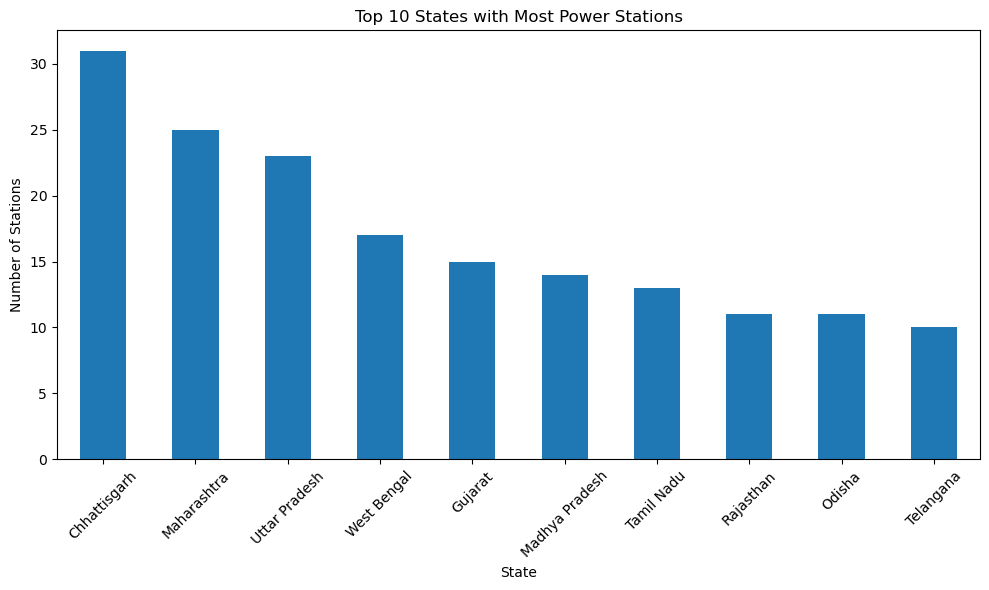

In [20]:
plt.figure(figsize=(10, 6))
df.groupby('state_name')['power_station_name'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 States with Most Power Stations')
plt.xlabel('State')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. Mode of Transport:
The pie chart illustrates the distribution of transport modes used to deliver coal to thermal power stations. It shows the proportion of each mode, such as Rail, Road, Conveyor, or MGR (Merry-Go-Round), highlighting the most commonly used logistics channels in coal transportation.



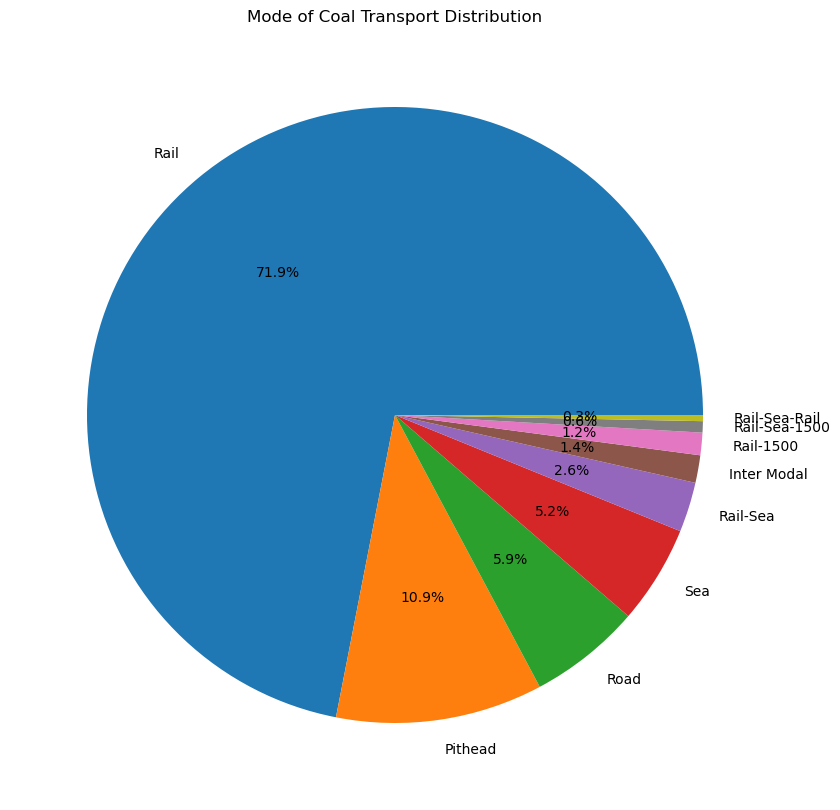

In [21]:
# 2. Mode of Transport
df['mode_of_transport'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Mode of Coal Transport Distribution')
plt.ylabel('')
plt.show()

#### 3. Sector-wise Distribution:
The bar chart displays the number of thermal power plants categorized by sector—such as Central, State, and Private. It helps identify which sector operates the most plants across the dataset.


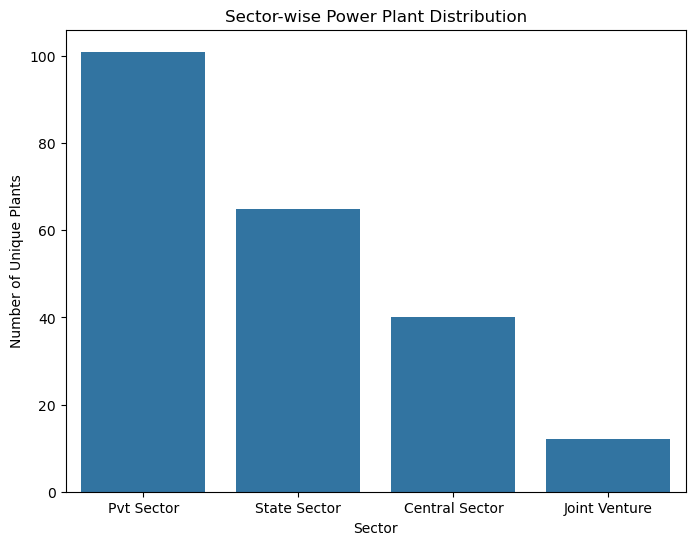

In [22]:
#3. Sector-wise Distribution
import seaborn as sns
import matplotlib.pyplot as plt
# Get unique plant counts per sector
sector_counts = df.groupby("sector")["power_station_name"].nunique().reset_index()
sector_counts = sector_counts.sort_values(by="power_station_name", ascending=False)
# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=sector_counts, x="sector", y="power_station_name")
plt.title("Sector-wise Power Plant Distribution")
plt.xlabel("Sector")
plt.ylabel("Number of Unique Plants")
plt.show()


### 11.2 Numerical Variables

#### 1. Normative Stock Days Distribution:
This histogram shows the distribution of normative stock days across power stations. It helps visualize how many days of coal stock are considered standard, with the KDE curve indicating the overall trend and concentration.

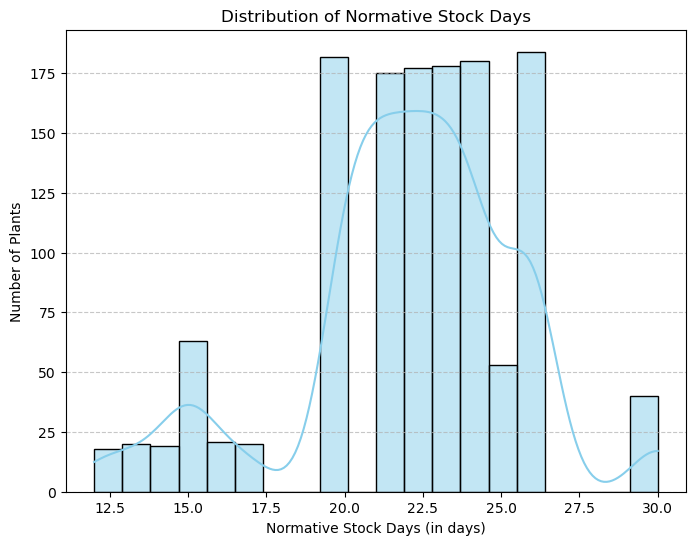

In [23]:
#4. Normative Stock Days Distribution
unique_plants = df[['power_station_name', 'normative_stock_days']].drop_duplicates()
plt.figure(figsize=(8,6))
sns.histplot(unique_plants['normative_stock_days'], bins=20, kde=True, 
             color="skyblue", edgecolor="black")
plt.title("Distribution of Normative Stock Days")
plt.xlabel("Normative Stock Days (in days)")
plt.ylabel("Number of Plants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Total Stock Distribution:
This boxplot illustrates the spread and outliers in the total coal stock across power stations. It helps identify the typical stock levels and detect any extreme values.

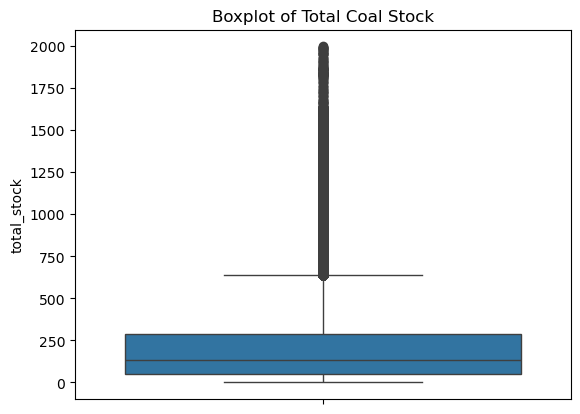

In [24]:
# 5. Total Stock Distribution

sns.boxplot(df['total_stock'])
plt.title("Boxplot of Total Coal Stock")
plt.show()

#### 3. PLF (Plant Load Factor) Distribution:
This histogram with a KDE curve shows how Plant Load Factor (%) is distributed across power stations. It helps us understand the efficiency range and identify common operating levels.

In [25]:
df['total_stock'].sum()

np.float64(72874205.54)

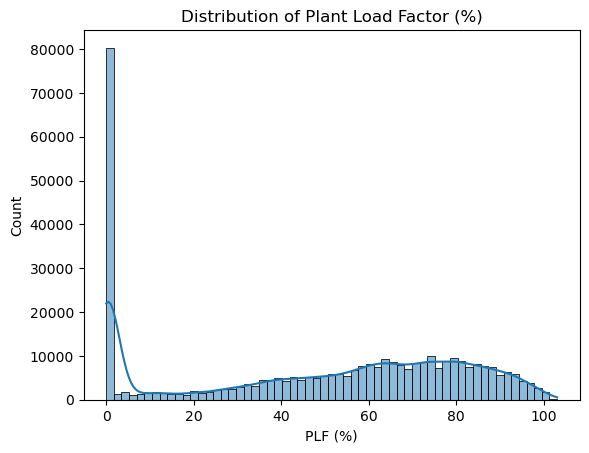

In [26]:
#6. PLF (Plant Load Factor) Distribution
sns.histplot(df['plf_prcnt'], kde=True)
plt.title("Distribution of Plant Load Factor (%)")
plt.xlabel("PLF (%)")
plt.show()

##  12. Bivariate Analysis
### 12.1 Correlation Matrix
This heatmap visualizes the correlation between key numerical variables such as capacity, daily requirement, coal stocks, and PLF (%). Strong positive or negative correlations help identify potential relationships or dependencies between operational factors in thermal power plants.


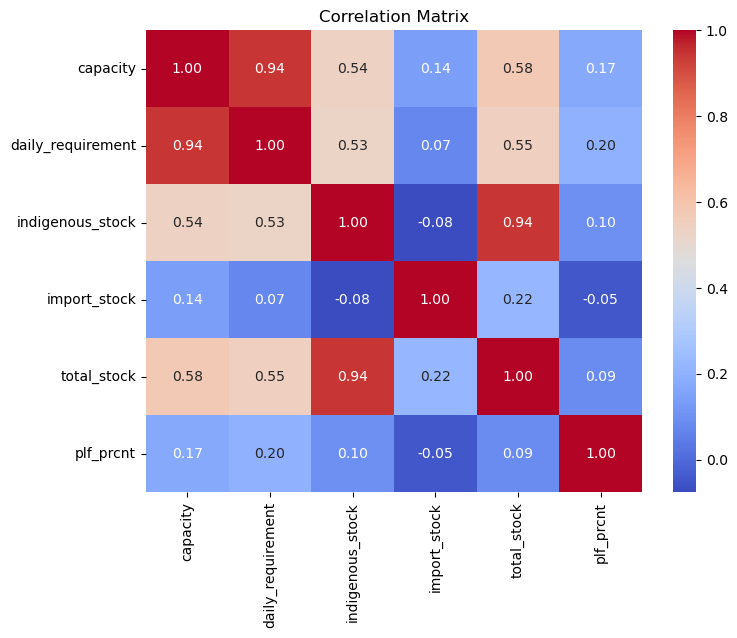

In [27]:
corr = df[['capacity', 'daily_requirement', 'indigenous_stock', 'import_stock', 'total_stock', 'plf_prcnt']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#### 12.2 Capacity vs PLF (%) by Sector:
This scatter plot compares the installed capacity of power plants with their Plant Load Factor (PLF), categorized by sector. It helps identify how efficiently plants of different sizes and sectors are operating. The transparency and color coding improve visual clarity, especially where points overlap.

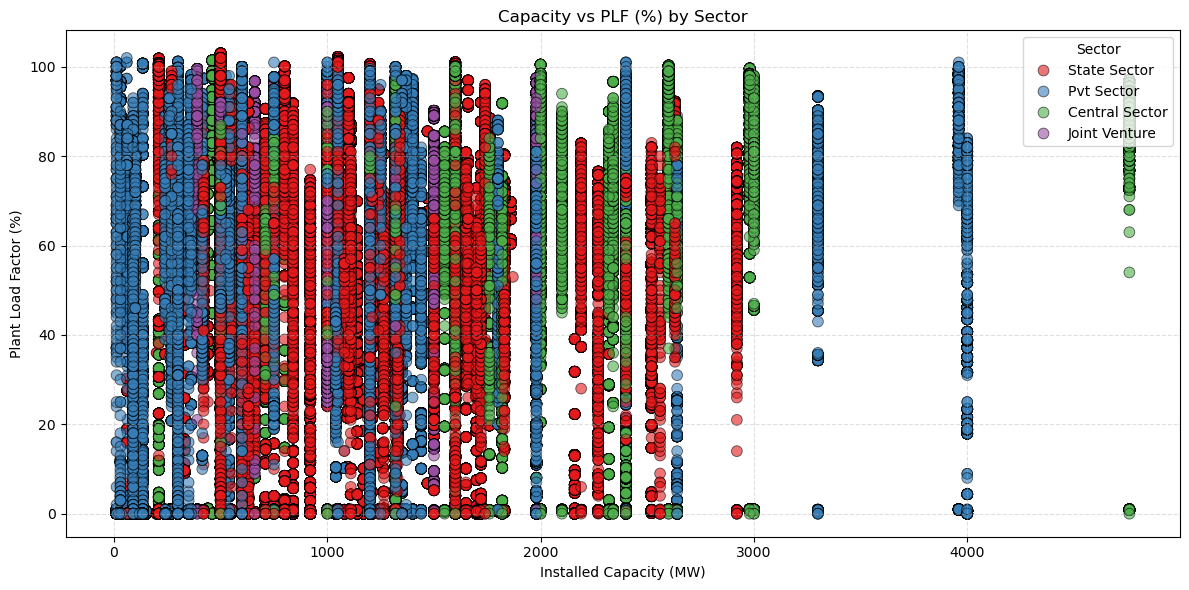

In [28]:
plt.figure(figsize=(12, 6))

# Use log scale for capacity if values vary greatly
sns.scatterplot(
    data=df, 
    x='capacity', 
    y='plf_prcnt', 
    hue='sector', 
    alpha=0.6,              # Slight transparency for overlap
    s=60,                   # Adjust point size
    edgecolor='k',          # Black border for clarity
    palette='Set1'          # Better color palette
)

plt.title("Capacity vs PLF (%) by Sector")
plt.xlabel("Installed Capacity (MW)")
plt.ylabel("Plant Load Factor (%)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Sector', loc='upper right')
plt.tight_layout()
plt.show()

#### 12.3 Total Stock by Mode of Transport:
This boxplot shows the distribution of total coal stock based on the mode of transport used. It highlights the variation in stock levels across different transport methods, helping identify which modes are associated with higher or more consistent stock availability

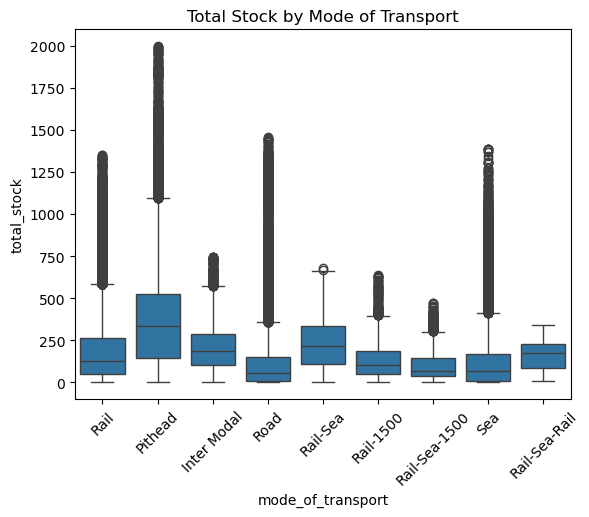

In [29]:
# 12.3 Stock by Mode of Transport

sns.boxplot(data=df, x='mode_of_transport', y='total_stock')
plt.title("Total Stock by Mode of Transport")
plt.xticks(rotation=45)
plt.show()

#### 12.4 Average Daily Requirement by Sector:
This bar chart illustrates the average daily coal requirement for each sector. It helps compare how different sectors (like Thermal, Captive, etc.) vary in their daily coal consumption, offering insight into sector-wise energy demands.


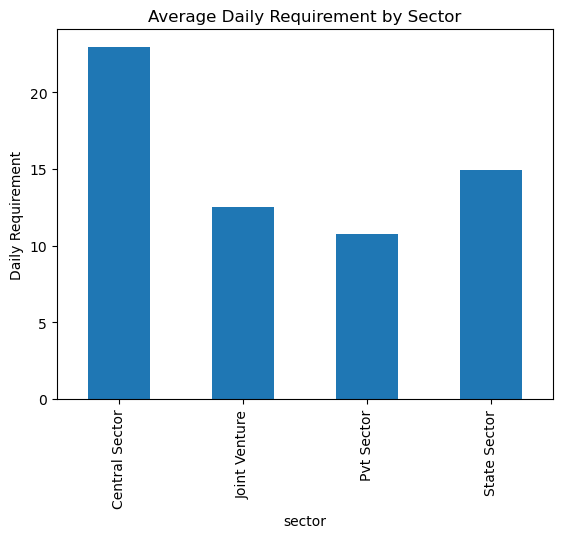

In [30]:
 # 12.4 Daily Requirement by Sector

df.groupby('sector')['daily_requirement'].mean().plot(kind='bar')
plt.title("Average Daily Requirement by Sector")
plt.ylabel("Daily Requirement")
plt.show()

## 📈 13. Time Series Analysis
### 13.1 Daily Trend of Total Stock

This line graph shows the trend of total coal stock across India over time. By aggregating the stock data by date, it helps visualize fluctuations in coal availability and detect patterns or anomalies in stock levels across the observed period.

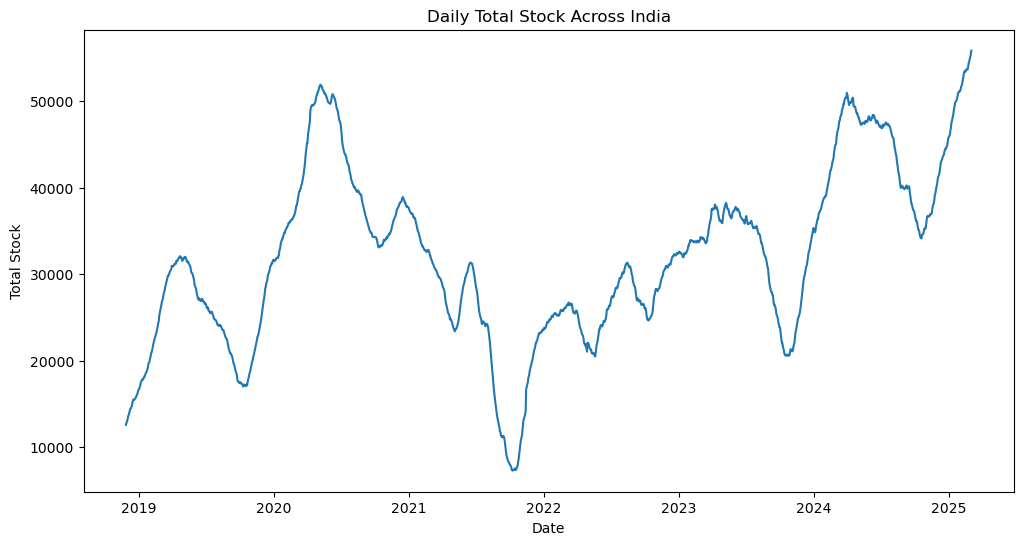

In [31]:
df_grouped = df.groupby('date')['total_stock'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='date', y='total_stock')
plt.title("Daily Total Stock Across India")
plt.xlabel("Date")
plt.ylabel("Total Stock")
plt.show()

#### 13.2 Moving Average Plot (7-day):
This plot overlays a 7-day moving average on the actual daily total coal stock to smooth out short-term fluctuations. It helps in identifying longer-term trends and patterns in coal stock levels, making it easier to understand the overall direction of change over time.

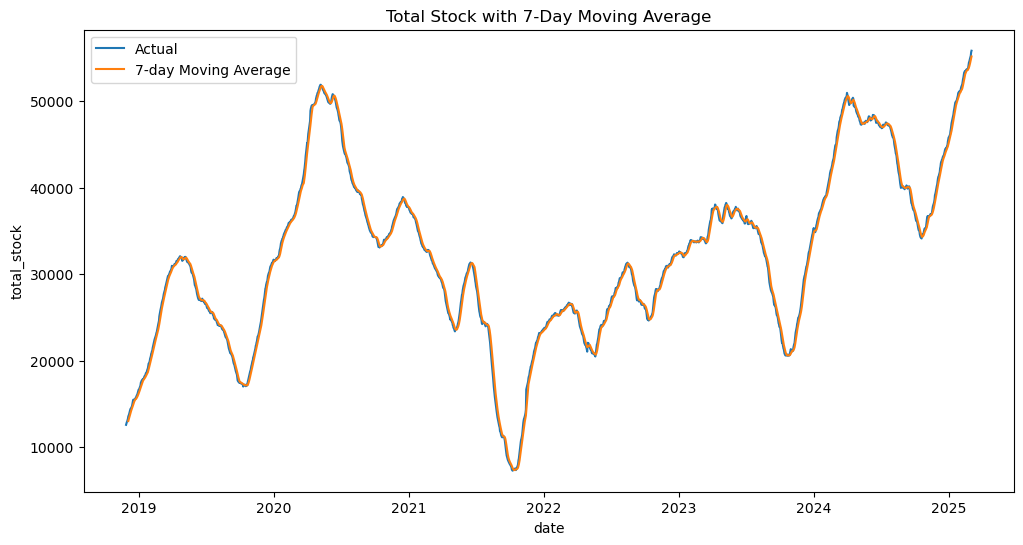

In [32]:
# 13.2 Moving Average Plot (7-day)
df_grouped['7_day_avg'] = df_grouped['total_stock'].rolling(7).mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='date', y='total_stock', label='Actual')
sns.lineplot(data=df_grouped, x='date', y='7_day_avg', label='7-day Moving Average')
plt.title("Total Stock with 7-Day Moving Average")
plt.legend()
# Save the figure before showing it
plt.savefig("7_day_moving_average_plot.png", dpi=300, bbox_inches='tight')

plt.show()


# Machine Learning Implementation

## Regression — Predict Future Coal Stock Levels

🏁 Starting Regression Model...
R2 Score: 0.9995614128129301
MAE: 0.5548185673587663
RMSE: 4.423216008420797


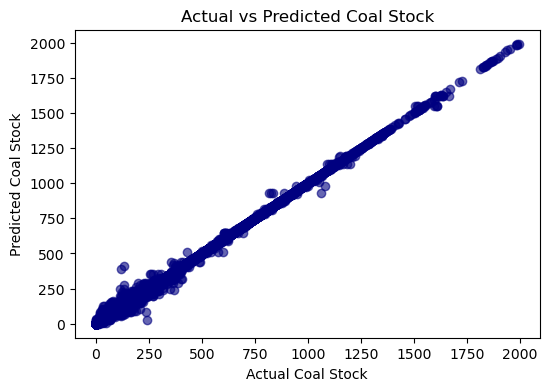

✅ Model saved successfully as rf_model.pkl


In [33]:
# --- Regression: Predicting Total Coal Stock ---
print("🏁 Starting Regression Model...")

# Feature selection
features = ['daily_requirement', 'plf_prcnt', 'normative_stock_days', 'indigenous_stock', 'import_stock']
target = 'total_stock'
X = df[features]
y = df[target]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='navy')
plt.xlabel("Actual Coal Stock")
plt.ylabel("Predicted Coal Stock")
plt.title("Actual vs Predicted Coal Stock")
plt.show()

# ✅ Save model
import joblib
joblib.dump(rf_reg, "rf_model.pkl")
print("✅ Model saved successfully as rf_model.pkl")


In [34]:
print("Training R2:", rf_reg.score(X_train, y_train))
print("Testing R2:", rf_reg.score(X_test, y_test))


Training R2: 0.9996951061396346
Testing R2: 0.9995614128129301


## Clustering — Identify Groups of Similar Plants

🏁 Starting Clustering Analysis...


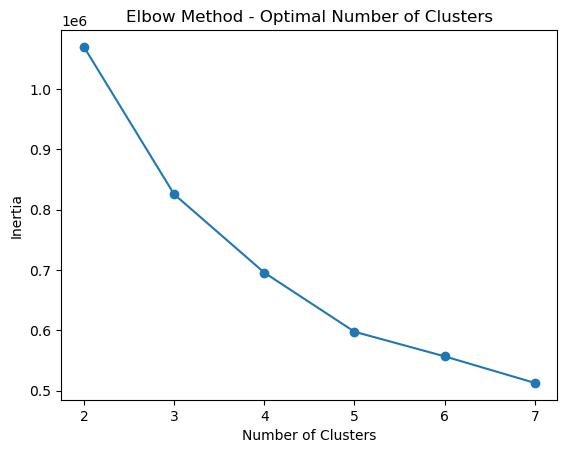

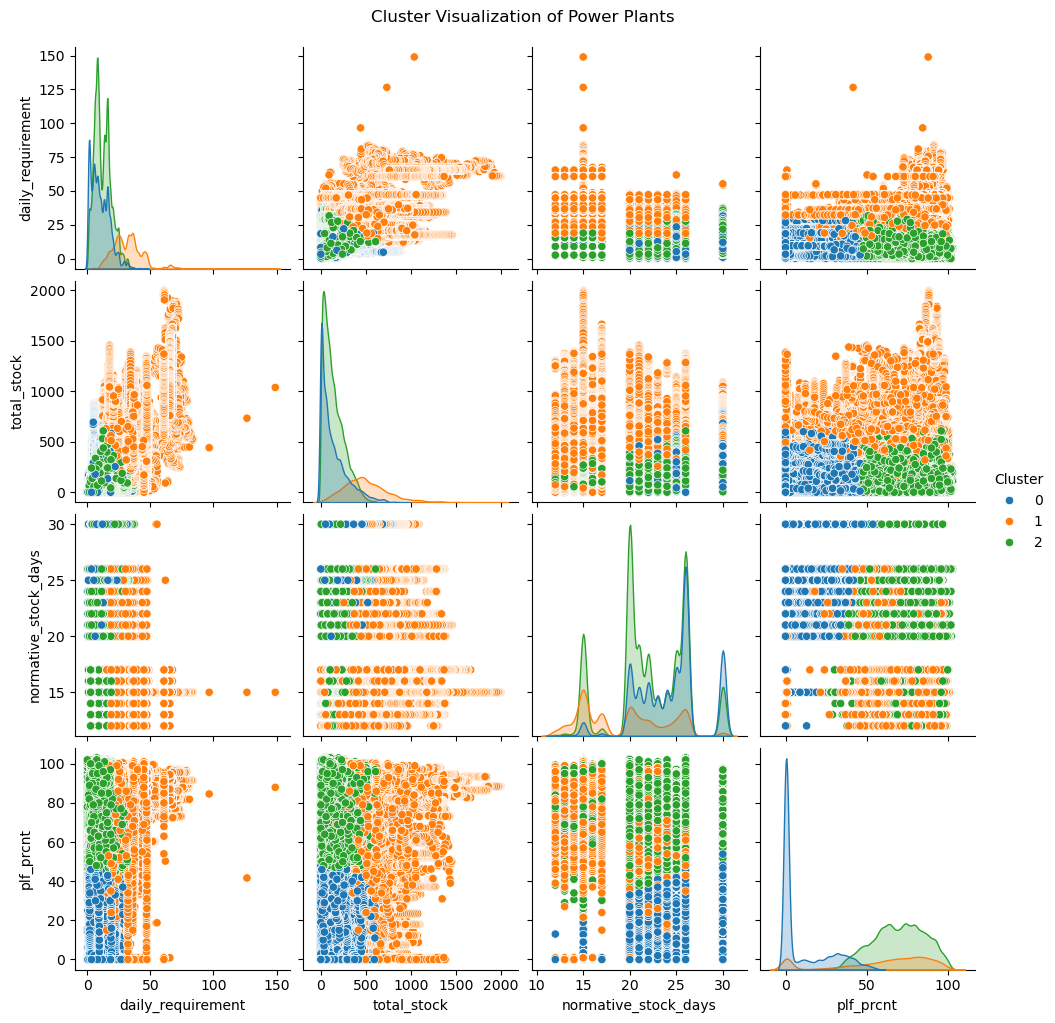

In [35]:
# --- Clustering: Similarity Among Plants ---
print("🏁 Starting Clustering Analysis...")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

clustering_features = ['daily_requirement', 'total_stock', 'normative_stock_days', 'plf_prcnt']
X_scaled = StandardScaler().fit_transform(df[clustering_features])

# Elbow method to choose optimal clusters
import matplotlib.pyplot as plt
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Final KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=clustering_features, palette='tab10')
plt.suptitle("Cluster Visualization of Power Plants", y=1.02)
plt.show()


## Forecasting — Predict Coal Stock Over Time

In [38]:
!pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ------------ --------------------------- 3.7/12.1 MB 20.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.9/12.1 MB 22.5 MB/s eta 0:00:01
   ---------------------------------------- 12.1/12.1 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 17.7 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---

🏁 Starting Forecasting...


13:41:06 - cmdstanpy - INFO - Chain [1] start processing
13:41:08 - cmdstanpy - INFO - Chain [1] done processing


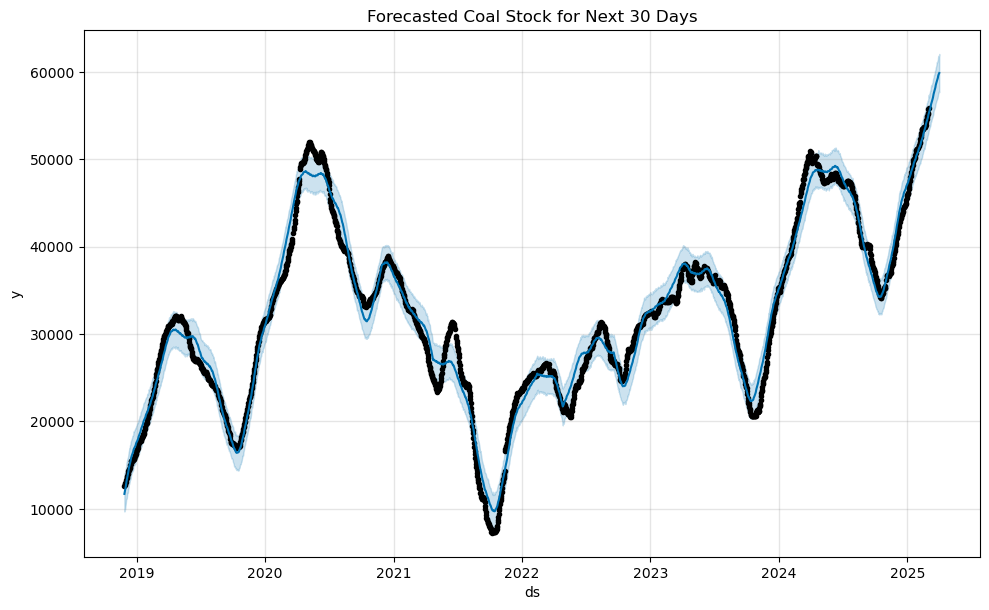

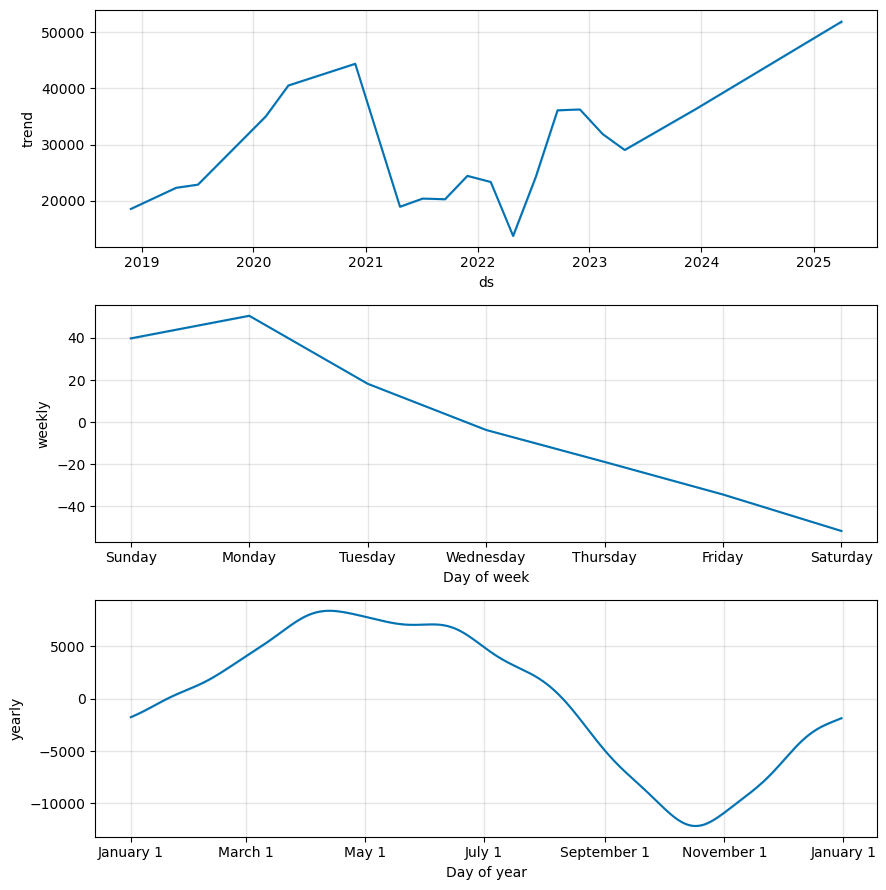

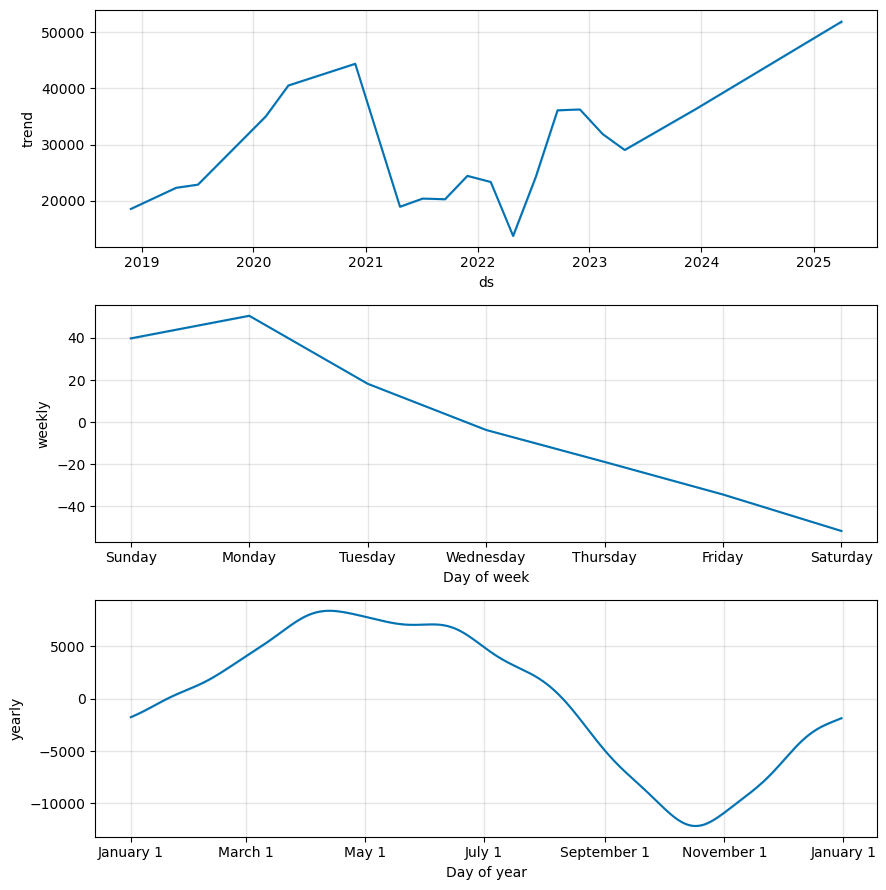

In [39]:

# --- Forecasting: Predicting Future Coal Stock ---
print("🏁 Starting Forecasting...")

from prophet import Prophet

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Aggregate by date (sum of all plants)
daily_data = df.groupby('date')['total_stock'].sum().reset_index()
daily_data.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y'

# Train Prophet model
model = Prophet()
model.fit(daily_data)

# Predict next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Forecasted Coal Stock for Next 30 Days")
plt.show()

model.plot_components(forecast)


# DEEP LEARNING 

## LSTM (Long Short-Term Memory Network)

In [21]:
!pip install tensorflow

  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/332.0 MB 255.9 kB/s eta 0:21:36
   ---------------------------------------- 0.8/332.0 MB 411.9 kB/s eta 0:13:25
   ---------------------------------------- 1.0/332.0 MB 530.5 kB/s eta 0:10:24
   ---------------------------------------- 1.3/332.0 MB 623.4 kB/s eta 0:08:51
   ---------------------------------------- 1.8/332

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ASUS\\AppData\\Local\\Temp\\pip-unpack-oen6_vw0\\tensorflow-2.20.0-cp313-cp313-win_amd64.whl'
Consider using the `--user` option or check the permissions.



In [ ]:
#importing libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = df.sort_values('date')

In [ ]:
features = ['daily_requirement', 'plf_prcnt', 'normative_stock_days', 'indigenous_stock', 'import_stock', 'total_stock']
data = df[features].values

In [ ]:
#Normalize the Data
#LSTMs train better on scaled values.

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
#Create Time Series Sequences Let’s use the last 7 days to predict the next day’s total_stock.

X, y = [], []
window = 7  # days used for prediction

for i in range(window, len(scaled_data)):
    X.append(scaled_data[i-window:i])       # previous 7 days
    y.append(scaled_data[i, -1])            # total_stock (last column)

X, y = np.array(X), np.array(y)

print("Input shape:", X.shape)

In [ ]:
#Split into Train/Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
#Build the LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
#Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

In [ ]:
#Evaluate Model
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_actual = scaler.inverse_transform(
    np.concatenate((np.zeros((y_test.shape[0], scaled_data.shape[1]-1)), y_test.reshape(-1,1)), axis=1)
)[:, -1]

y_pred_actual = scaler.inverse_transform(
    np.concatenate((np.zeros((y_pred.shape[0], scaled_data.shape[1]-1)), y_pred), axis=1)
)[:, -1]

# Metrics
print("R2 Score:", r2_score(y_test_actual, y_pred_actual))
print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))


In [ ]:
#Training Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training Progress")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
#Actual vs Predicted Coal Stock
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Stock', color='blue')
plt.plot(y_pred_actual, label='Predicted Stock', color='orange')
plt.title("Actual vs Predicted Coal Stock (LSTM)")
plt.xlabel("Time")
plt.ylabel("Coal Stock (Tonnes)")
plt.legend()
plt.show()

In [ ]:
df = df.sort_values(by='date')  # ensure chronological order

In [ ]:
df.columns

In [ ]:
# --- LSTM Model for Predicting Total Coal Stock ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -----------------------------
# 1️⃣ Data Scaling
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['daily_requirement',
                                       'plf_prcnt',
                                       'normative_stock_days',
                                       'indigenous_stock',
                                       'import_stock',
                                       'total_stock']])

# -----------------------------
# 2️⃣ Sequence Creation Function
# -----------------------------
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length=5)

# -----------------------------
# 3️⃣ Train-Test Split
# -----------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# -----------------------------
# 4️⃣ Build Optimized LSTM Model
# -----------------------------
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# -----------------------------
# 5️⃣ Training with EarlyStopping
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 6️⃣ Prediction & Inverse Scaling
# -----------------------------
y_pred = model.predict(X_test)

# Inverse scaling only for total_stock
y_pred_rescaled = scaler.inverse_transform(
    np.concatenate((np.zeros((len(y_pred), scaled_data.shape[1]-1)), y_pred.reshape(-1, 1)), axis=1)
)[:, -1]

y_test_rescaled = scaler.inverse_transform(
    np.concatenate((np.zeros((len(y_test), scaled_data.shape[1]-1)), y_test.reshape(-1, 1)), axis=1)
)[:, -1]

# -----------------------------
# 7️⃣ Evaluation
# -----------------------------
print("R2 Score:", r2_score(y_test_rescaled, y_pred_rescaled))
print("MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)))

# -----------------------------
# 8️⃣ Visualization
# -----------------------------
plt.figure(figsize=(9,5))
plt.plot(y_test_rescaled, label='Actual Total Stock', linewidth=2)
plt.plot(y_pred_rescaled, label='Predicted Total Stock', linestyle='--', color='orange', linewidth=2)
plt.title("📊 LSTM - Actual vs Predicted Total Coal Stock", fontsize=13)
plt.xlabel("Time Step")
plt.ylabel("Total Coal Stock (Tonnes)")
plt.legend()
plt.grid(True)
plt.show()

# Optional: visualize training progress
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("📉 Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


# CNN

In [ ]:
# --- CNN for Regression: Predicting Coal Stock ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ 1. Select Features
features = ['daily_requirement', 'plf_prcnt', 'normative_stock_days', 'indigenous_stock', 'import_stock']
target = 'total_stock'

X = df[features].values
y = df[target].values

# ✅ 2. Normalize Data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# ✅ 3. Reshape for CNN (samples, timesteps, features)
# CNN expects 3D input: (batch_size, timesteps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ✅ 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# ✅ 5. Build CNN Model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# ✅ 6. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# ✅ 7. Evaluate Performance
y_pred = model.predict(X_test)
y_test_rescaled = scaler_y.inverse_transform(y_test)
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

print("R2 Score:", r2_score(y_test_rescaled, y_pred_rescaled))
print("MAE:", mean_absolute_error(y_test_rescaled, y_pred_rescaled))
print("RMSE:", sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)))

# ✅ 8. Plot Training Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


# new

In [23]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optr

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 8357.7256 - val_loss: 1077.9681
Epoch 2/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1333.8013 - val_loss: 1068.7590
Epoch 3/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1298.5197 - val_loss: 1049.8832
Epoch 4/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1280.2505 - val_loss: 1045.4556
Epoch 5/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1266.9735 - val_loss: 1035.8864
Epoch 6/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 1256.1160 - val_loss: 1037.5326
Epoch 7/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1239.0775 - val_loss: 1033.7928
Epoch 8/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1231.8048 - val_loss: 1027.4902
Epoch 9/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1215.2517 - val_loss: 1022.3146
Epoch 10/10
3621/3621 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1205.1423 - val_loss: 1020.3695
2263/2263 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step

ANN Result

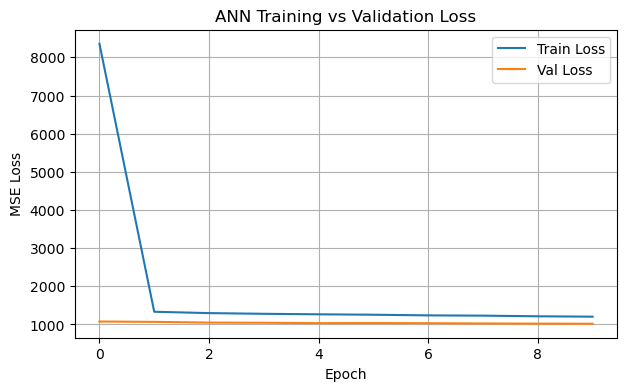

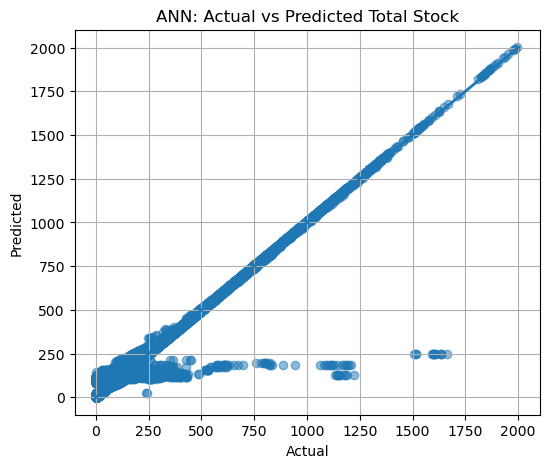

In [24]:
# --- ANN: Tabular Regression for Total Stock ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1) Feature setup
candidate_features = [
    'capacity',
    'daily_requirement',
    'normative_stock_days',
    'indigenous_stock',
    'import_stock',
    'plf_prcnt'
]
available_features = [c for c in candidate_features if c in df.columns]
assert 'total_stock' in df.columns, "total_stock must be in df"

X = df[available_features].astype(float)
y = df['total_stock'].astype(float)

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Scale features (helps ANN)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) Build small ANN (fast)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 5) Train quickly with early stopping
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=10,           # low epochs -> fast
    batch_size=64,       # larger batch -> faster
    callbacks=[es],
    verbose=1
)

# 6) Evaluate
y_pred = model.predict(X_test_s).ravel()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nANN Results")
print("R2  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

# 7) Plots
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("ANN Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([mn, mx], [mn, mx], linewidth=2)
plt.title("ANN: Actual vs Predicted Total Stock")
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.grid(True); plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0972 - val_loss: 0.0050
Epoch 2/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0027
Epoch 3/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0069 - val_loss: 7.2923e-04
Epoch 4/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0047 - val_loss: 5.0491e-04
Epoch 5/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 2.1145e-04
Epoch 6/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 5.2938e-04
Epoch 7/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - val_loss: 4.7830e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

LSTM Results
R2  : 0.9788066645907814
MAE : 776.8946019754956
RMSE: 891.6163511630511


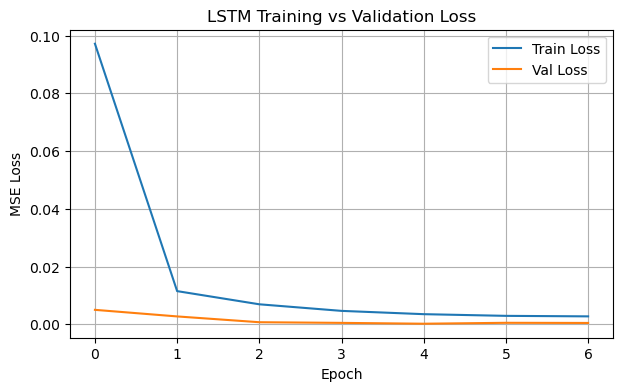

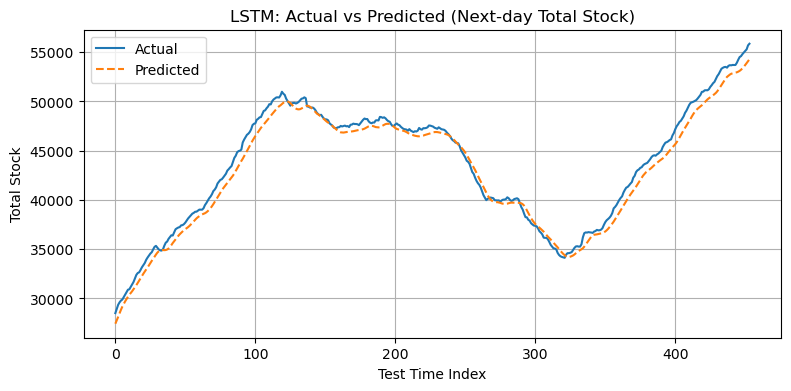

In [25]:
# --- LSTM: Next-day Forecast from Last 7 Days ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1) Prepare daily total series
d = df.copy()
d['date'] = pd.to_datetime(d['date'])
daily = d.groupby('date')['total_stock'].sum().reset_index().sort_values('date')

values = daily['total_stock'].values.reshape(-1, 1)

# 2) Scale to [0,1] for LSTM
scaler = MinMaxScaler()
values_s = scaler.fit_transform(values)

# 3) Build sequences (last 7 days -> next day)
def make_seq(arr, lookback=7):
    Xs, ys = [], []
    for i in range(len(arr) - lookback):
        Xs.append(arr[i:i+lookback, 0])
        ys.append(arr[i+lookback, 0])
    Xs = np.array(Xs)
    ys = np.array(ys)
    return Xs.reshape((Xs.shape[0], lookback, 1)), ys

lookback = 7
X, y = make_seq(values_s, lookback=lookback)

# 4) Train/Test split (keep time order)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5) Small LSTM model (fast)
model_ts = Sequential([
    LSTM(32, return_sequences=False, input_shape=(lookback, 1)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])
model_ts.compile(optimizer='adam', loss='mse')

# 6) Train quickly
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
hist = model_ts.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=8,          # few epochs -> quick
    batch_size=64,     # faster training
    callbacks=[es],
    verbose=1
)

# 7) Predict + inverse scale
y_pred_s = model_ts.predict(X_test).ravel()
y_pred = scaler.inverse_transform(y_pred_s.reshape(-1,1)).ravel()
y_true = scaler.inverse_transform(y_test.reshape(-1,1)).ravel()

# 8) Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("\nLSTM Results")
print("R2  :", r2_score(y_true, y_pred))
print("MAE :", mean_absolute_error(y_true, y_pred))
print("RMSE:", rmse)

# 9) Plots
plt.figure(figsize=(7,4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title("LSTM Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(9,4))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title("LSTM: Actual vs Predicted (Next-day Total Stock)")
plt.xlabel("Test Time Index"); plt.ylabel("Total Stock")
plt.legend(); plt.grid(True); plt.show()
